<a href="https://colab.research.google.com/github/theabhinav0231/dive_into_deep_learning_book/blob/main/10_3_Deep_RNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 679.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.0/125.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfu

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

## **Deep Recurrent Neural Networks**


The standard method for building this sort of deep RNN is strikingly simple: we stack
the RNNs on top of each other. Given a sequence of length 𝑇, the first RNN produces a
sequence of outputs, also of length 𝑇. These, in turn, constitute the inputs to the next RNN
layer.

Each hidden state operates on a sequential input and produces a sequential
output. Moreover, any RNN cell at each time step depends on
both the same layer’s value at the previous time step and the previous layer’s value at the
same time step.

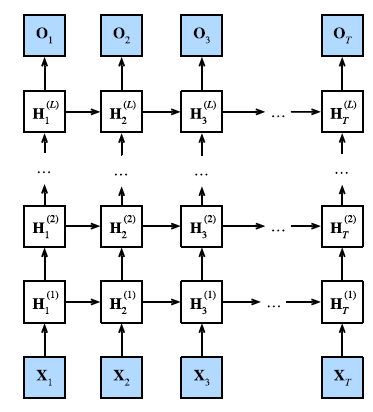

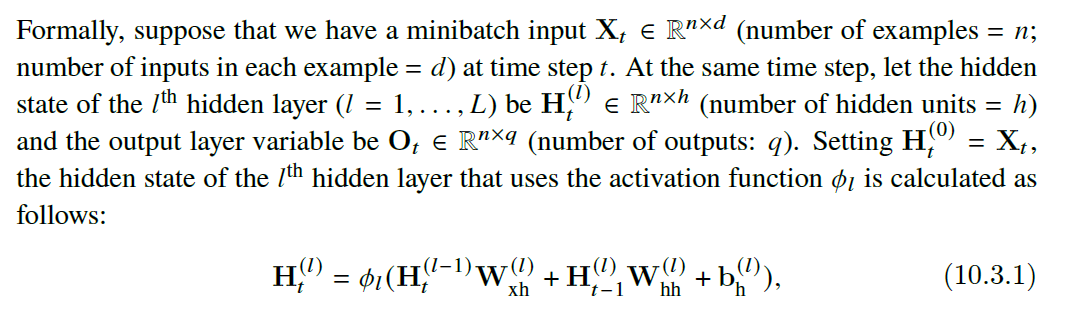

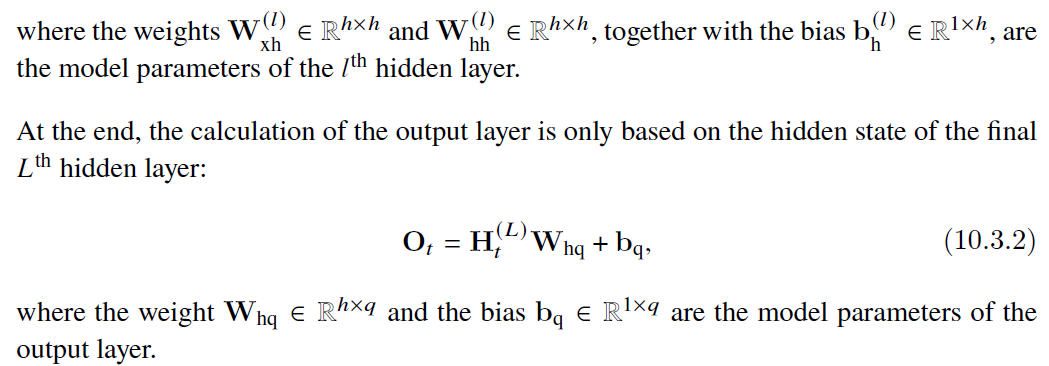

## **Implementation from Scratch**



In [3]:
class StackedRNNScratch(d2l.Module):
  def __init__(self, num_inputs, num_hiddens, num_layers, sigma=0.01):
    super().__init__()
    self.save_hyperparameters()
    self.rnns = nn.Sequential(*[d2l.RNNScratch(
        num_inputs if i==0 else num_hiddens, num_hiddens, sigma)
          for i in range(num_layers)])

  def forward(self, inputs, Hs=None):
    outputs = inputs
    if Hs is None:
      Hs = [None] * self.num_layers
    for i in range(self.num_layers):
      outputs, Hs[i] = self.rnns[i](outputs, Hs[i])
      outputs = torch.stack(outputs, 0)
    return outputs, Hs

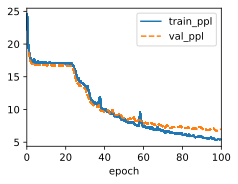

In [4]:
data = d2l.TimeMachine(batch_size=1024, num_steps=32)
rnn_block = StackedRNNScratch(num_inputs=len(data.vocab),
            num_hiddens=32, num_layers=2)
model = d2l.RNNLMScratch(rnn_block, vocab_size=len(data.vocab), lr=2)
trainer = d2l.Trainer(max_epochs=100, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)

In [5]:
model.predict("it has", 20, data.vocab, d2l.try_gpu())

'it has the pean sime the p'

## **Concise Impelmentation**

In [6]:
class GRU(d2l.RNN):
  def __init__(self, num_inputs, num_hiddens, num_layers, dropout=0):
    d2l.Module.__init__(self)
    self.save_hyperparameters()
    self.rnn = nn.GRU(num_inputs, num_hiddens, num_layers,
                      dropout=dropout)

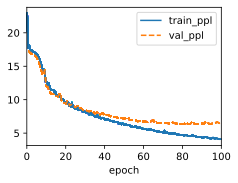

In [7]:
gru = GRU(num_inputs=len(data.vocab), num_hiddens=32, num_layers=2)
model = d2l.RNNLM(gru, vocab_size=len(data.vocab), lr=2)
trainer.fit(model, data)

In [8]:
model.predict('it has', 20, data.vocab, d2l.try_gpu())

'it has it is have and the '